In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv("data/city_data.csv")
rideData = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
mergedData = pd.merge(rideData, cityData, on="city")

# Display the data table for preview
mergedData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Create dataframes to use in rest of code
urban = mergedData.loc[mergedData["type"] == "Urban"]
rural = mergedData.loc[mergedData["type"] == "Rural"]
suburb = mergedData.loc[mergedData["type"] == "Suburban"]

In [3]:
# Fares dataframe
avgFare = round(mergedData.groupby(['city'])['fare'].mean(), 2)
avgUrban = round(urban.groupby(['city'])['fare'].mean(), 2)
avgRural = round(rural.groupby(['city'])['fare'].mean(), 2)
avgSuburb = round(suburb.groupby(['city'])['fare'].mean(), 2)
avgFare.head()

city
Amandaburgh      24.64
Barajasview      25.33
Barronchester    36.42
Bethanyland      32.96
Bradshawfurt     40.06
Name: fare, dtype: float64

In [4]:
# Rides dataframe
totalRides = mergedData.groupby(['city'])['ride_id'].count()
urbanRides = urban.groupby(['city'])['ride_id'].count()
ruralRides = rural.groupby(['city'])['ride_id'].count()
suburbRides = suburb.groupby(['city'])['ride_id'].count()
totalRides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [5]:
# Drivers dataframe
totalDrivers = mergedData.groupby(['city'])['driver_count'].mean()
urbanDrivers = urban.groupby(['city'])['driver_count'].mean()
ruralDrivers = rural.groupby(['city'])['driver_count'].mean()
suburbDrivers = suburb.groupby(['city'])['driver_count'].mean()
totalDrivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types
urbanX = urbanRides
urbanY = avgUrban
ruralX = ruralRides
ruralY = avgRural
suburbX = suburbRides
suburbY = avgSuburb

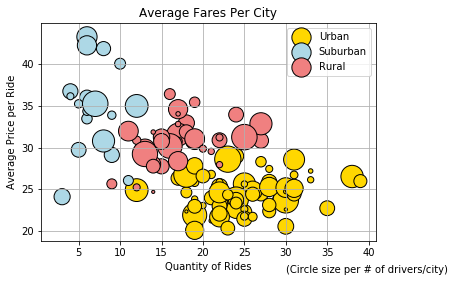

In [8]:
# Build the scatter plots for each city types
plt.title('Average Fares Per City');
plt.scatter(urbanX, urbanY, s = 10*totalDrivers,c="gold",marker="o",edgecolors="black", label="Urban")
plt.scatter(ruralX, ruralY, s = 10*totalDrivers,c="lightblue",marker="o",edgecolors="black", label="Suburban")
plt.scatter(suburbX, suburbY, s = 10*totalDrivers,c="lightcoral",marker="o",edgecolors="black", label="Rural")

# Incorporate other graph properties
plt.grid()
plt.xlabel("Quantity of Rides")
plt.ylabel("Average Price per Ride")

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(30, 15, "(Circle size per # of drivers/city)")

# Save Figure
plt.savefig("../Images/avgFarePerCity.png")
plt.show()

## Total Fares by City Type

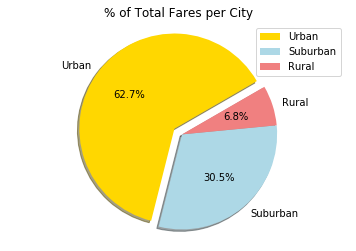

In [9]:
# Calculate Fares Percents
urbanFare = urban['fare'].sum()
suburbFare = suburb['fare'].sum()
ruralFare = rural['fare'].sum()

# Build Pie Chart
fares = [urbanFare, suburbFare, ruralFare]
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0.1, 0, 0)

# Plot Layout of Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=30)

# Add axis and Label
plt.axis("equal")
plt.title("% of Total Fares per City")

# Create a legend
plt.legend(loc="best")

# Save Figure
plt.savefig("../Images/totalFarePerCity.png")

# Show Figure
plt.show()

## Total Rides by City Type

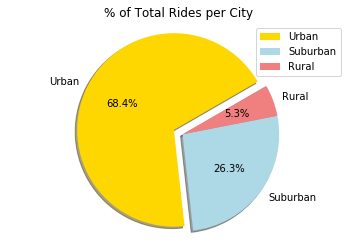

In [10]:
# Calculate Rides Percents
urbanRide = urban['ride_id'].count()
suburbRide = suburb['ride_id'].count()
ruralRide = rural['ride_id'].count()

# Build Pie Chart
rides = [urbanRide, suburbRide, ruralRide]
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0.1, 0, 0)

# Plot Layout of Pie Chart
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=30)

# Add axis and Label
plt.axis("equal")
plt.title("% of Total Rides per City")

# Create a legend
plt.legend(loc="best")

# Save Figure
plt.savefig("../Images/totalRidesPerCity.png")

# Show Figure
plt.show()

## Total Drivers by City Type

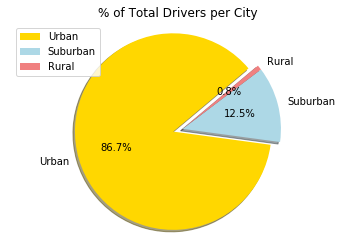

In [11]:
# Calculate Drivers Percents
urbanDriver = urban['driver_count'].sum()
suburbDriver = suburb['driver_count'].sum()
ruralDriver = rural['driver_count'].sum()

# Build Pie Chart
drivers = [urbanDriver, suburbDriver, ruralDriver]
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0.1, 0, 0)

# Plot Layout of Pie Chart
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)

# Add axis and Label
plt.axis("equal")
plt.title("% of Total Drivers per City")

# Create a legend
plt.legend(loc="best")

# Save Figure
plt.savefig("../Images/totalDriversPerCity.png")

# Show Figure
plt.show()